<a href="https://colab.research.google.com/github/kavita200496/Computer-Vision/blob/master/Corner_detection_without_using_library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import cv2

In [ ]:
from skimage.io import imread
from skimage.color import rgb2gray
img = imread('liberty3.jpg')
imggray = rgb2gray(img)

In [ ]:
from scipy import signal as sig
import numpy as np
def gradient_x(imggray):
    ##Sobel operator kernels.
    kernel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
    return sig.convolve2d(imggray, kernel_x, mode='same')
def gradient_y(imggray):
    kernel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    return sig.convolve2d(imggray, kernel_y, mode='same')
I_x = gradient_x(imggray)
I_y = gradient_y(imggray)

In [ ]:
from scipy import ndimage

In [ ]:
Ixx = ndimage.gaussian_filter(I_x**2, sigma=1)
Ixy = ndimage.gaussian_filter(I_y*I_x, sigma=1)
Iyy = ndimage.gaussian_filter(I_y**2, sigma=1)

In [ ]:
k = 0.05
# determinant
detA = Ixx * Iyy - Ixy ** 2
# trace
traceA = Ixx + Iyy
    
harris_response = detA - k * traceA ** 2

In [ ]:
offset = 1
height = 3
width = 3
for y in range(offset, height-offset):
    for x in range(offset, width-offset):
        Sxx = np.sum(Ixx[y-offset:y+1+offset, x-offset:x+1+offset])
        Syy = np.sum(Iyy[y-offset:y+1+offset, x-offset:x+1+offset])
        Sxy = np.sum(Ixy[y-offset:y+1+offset, x-offset:x+1+offset])

In [ ]:
det = (Sxx * Syy) - (Sxy**2)
trace = Sxx + Syy
r = det - k*(trace**2)

In [ ]:
img_copy_for_corners = np.copy(img)
img_copy_for_edges = np.copy(img)
for rowindex, response in enumerate(harris_response):
    for colindex, r in enumerate(response):
        if r > 0:
            # this is a corner
            img_copy_for_corners[rowindex, colindex] = [255,0,0]
        elif r < 0:
            # this is an edge
            img_copy_for_edges[rowindex, colindex] = [0,255,0]

In [ ]:
from skimage.feature import corner_harris, corner_peaks

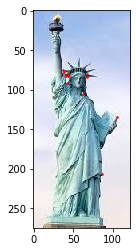

In [ ]:
corners = corner_peaks(harris_response)
fig, ax = plt.subplots()
ax.imshow(img, interpolation='nearest', cmap=plt.cm.gray)
ax.plot(corners[:, 1], corners[:, 0], '.r', markersize=3)

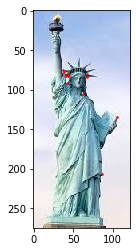

In [ ]:
coords = corner_peaks(harris_response)
fig, ax = plt.subplots()
ax.imshow(img, interpolation='nearest', cmap=plt.cm.gray)
ax.plot(coords[:, 1], coords[:, 0], '.r', markersize=3)